In [15]:
#Load packages
import scanpy as sc
import pandas as pd
import seaborn as sns
import numpy as np
sc.settings.verbosity = 1            
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3), facecolor='white') 
import matplotlib.pyplot as plt

In [2]:
#Read raw file
cyto = pd.read_csv('analysis_Cytomarker_patient3/output/measurements.csv')

In [3]:
cyto

113In_Ecad  115In_PanCK  141Pr_CK8/18   144Nd_CK5  145Nd_CK14  \
0        0.352941     0.529412      0.058824    0.470588    0.176471   
1        0.285714     0.714286      0.142857    1.857143    0.571429   
2        3.661972    17.295775      0.619718  110.267606   11.394366   
3        0.375000     0.125000      0.000000    0.250000    0.125000   
4        0.590909     1.727273      0.045455    0.363636    0.090909   
...           ...          ...           ...         ...         ...   
15639    0.130435     0.826087      0.000000    0.086957    0.065217   
15640    0.103448     0.172414      0.068966    0.068966    0.034483   
15641    0.000000     0.724138      0.000000    0.000000    0.034483   
15642    1.125000     0.250000      0.062500    0.437500    0.250000   
15643    0.166667     0.000000      0.000000    0.000000    0.000000   

       146Nd_CK19  147Sm_COL1A2  148Nd_Claudin3  153Eu_CD24  157Gd_COL17A1  \
0        0.294118      8.470588        0.705882    1.058824       1.058824   
1        0.000000      6.000000        1.285714    0.428571       1.428571   
2        2.154930      3.507042        1.549296    1.154930       1.985915   
3        0.083333      6.250000        0.916667    1.333333       0.625000   
4        0.227273     12.500000        1.272727    0.772727       1.454545   
...           ...           ...             ...         ...            ...   
15639    0.065217      8.391304        0.391304    0.130435       0.152174   
15640    0.034483      4.551724        0.482759    0.068966       0.482759   
15641    0.034483      9.000000        0.344828    0.068966       0.137931   
15642    0.062500      6.187500        0.687500    0.750000       0.250000   
15643    0.000000      4.166667        0.166667    0.166667       0.083333   

       ...  193Ir_DNA2  196Pt_CD31  209Bi_SMA                 sample  cell_id  \
0      ...  135.705882    5.705882   2.411765  Cytomarker_Patient3_3        1   
1      ...   42.428571    1.571429   0.285714  Cytomarker_Patient3_3        2   
2      ...   92.098592    1.887324  23.859155  Cytomarker_Patient3_3        3   
3      ...  114.666667    3.083333   2.791667  Cytomarker_Patient3_3        4   
4      ...   59.227273    6.136364  18.636364  Cytomarker_Patient3_3        5   
...    ...         ...         ...        ...                    ...      ...   
15639  ...  112.478261    0.565217   1.086957  Cytomarker_Patient3_1     3626   
15640  ...   91.310345    0.551724  32.689655  Cytomarker_Patient3_1     3627   
15641  ...   39.275862    0.172414   0.137931  Cytomarker_Patient3_1     3628   
15642  ...   71.812500    2.562500   0.250000  Cytomarker_Patient3_1     3629   
15643  ...   69.333333    0.666667   0.916667  Cytomarker_Patient3_1     3630   

                 x            y  x_max  y_max  area  
0         5.235294     0.529412      9      1    17  
1        48.285714     0.428571     50      1     7  
2        90.239437     0.971831    102      3    71  
3       154.000000     0.791667    158      2    24  
4       137.500000     0.909091    141      2    22  
...            ...          ...    ...    ...   ...  
15639  1020.391304  1436.456522   1024   1439    46  
15640   972.137931  1436.827586    975   1439    29  
15641  1072.965517  1437.137931   1076   1439    29  
15642   206.500000  1438.500000    210   1439    16  
15643   345.416667  1438.166667    347   1439    12  

[15644 rows x 29 columns]

In [4]:
#Remove ROI 5 due to poor segmentation
cyto = cyto[cyto['sample'] != 'Cytomarker_Patient3_5']

In [5]:
#drop unwanted colums and rename marker columns
cyto = cyto.drop(['191Ir_DNA1', '193Ir_DNA2', 'sample', 'cell_id', 'x', 'y', 'x_max', 
                          'y_max', 'area'], axis = 1)
rename_dict = {
    '113In_Ecad': 'E-Cadherin',
    '115In_PanCK': 'PanCK',
    '141Pr_CK8/18': 'CK8/18',
    '144Nd_CK5': 'CK5',
    '145Nd_CK14': 'CK14', 
    '146Nd_CK19': 'CK19', 
    '147Sm_COL1A2': 'Collagen1',
    '148Nd_Claudin3': 'Claudin3', 
    '153Eu_CD24': 'CD24',
    '157Gd_COL17A1': 'Collagen17', 
    '161Dy_Claudin5': 'Claudin5', 
    '162Dy_COL4A1': 'Collagen4', 
    '166Er_CD74': 'CD74', 
    '169Tm_CK17': 'CK17', 
    '170Er_APOD': 'Apo-D', 
    '172Yb_PDGFRAB': 'PDGFRA+B', 
    '174Yb_CD45': 'CD45', 
    '175Lu_CK15': 'CK15', 
    '196Pt_CD31': 'CD31', 
    '209Bi_SMA': 'SMA', 
}
cyto = cyto.rename(columns=rename_dict)
cyto = cyto.reset_index(drop=True)

In [6]:
#create anndata from dataframe for clustering
cyto = sc.AnnData(cyto)

/Users/golnazabazari/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [7]:
cyto

AnnData object with n_obs × n_vars = 12765 × 20

In [8]:
#define function for normalizing and clustering anndata
def process_patient_data(patient):
    cutoff_value = np.percentile(patient.X, q=99.8, axis=0)
    patient = patient[np.all(patient.X < cutoff_value, axis=1), :]
    max_value = np.max(patient.X, axis=0)
    patient.X = patient.X / max_value
    sc.pp.pca(patient)
    sc.pp.neighbors(patient)
    sc.tl.umap(patient)
    sc.tl.leiden(patient, resolution = 0.2) 
    sc.pl.umap(patient, color='leiden')
    return patient

/Users/golnazabazari/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


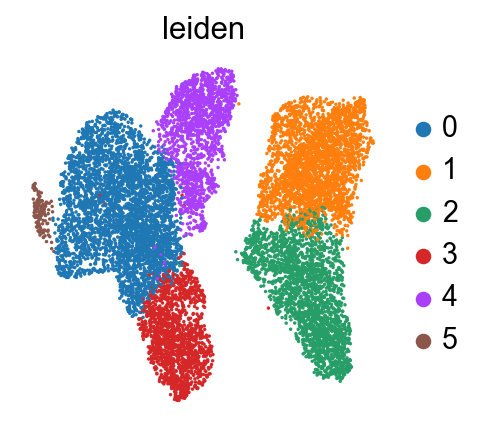

In [9]:
#process anndata
cyto_ad = process_patient_data(cyto)

/Users/golnazabazari/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


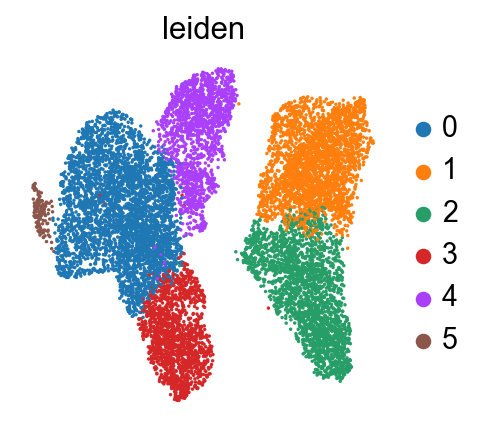

In [10]:
#save plot as pdf
sc.pl.umap(cyto_ad, color='leiden', save='umap_plot.pdf')

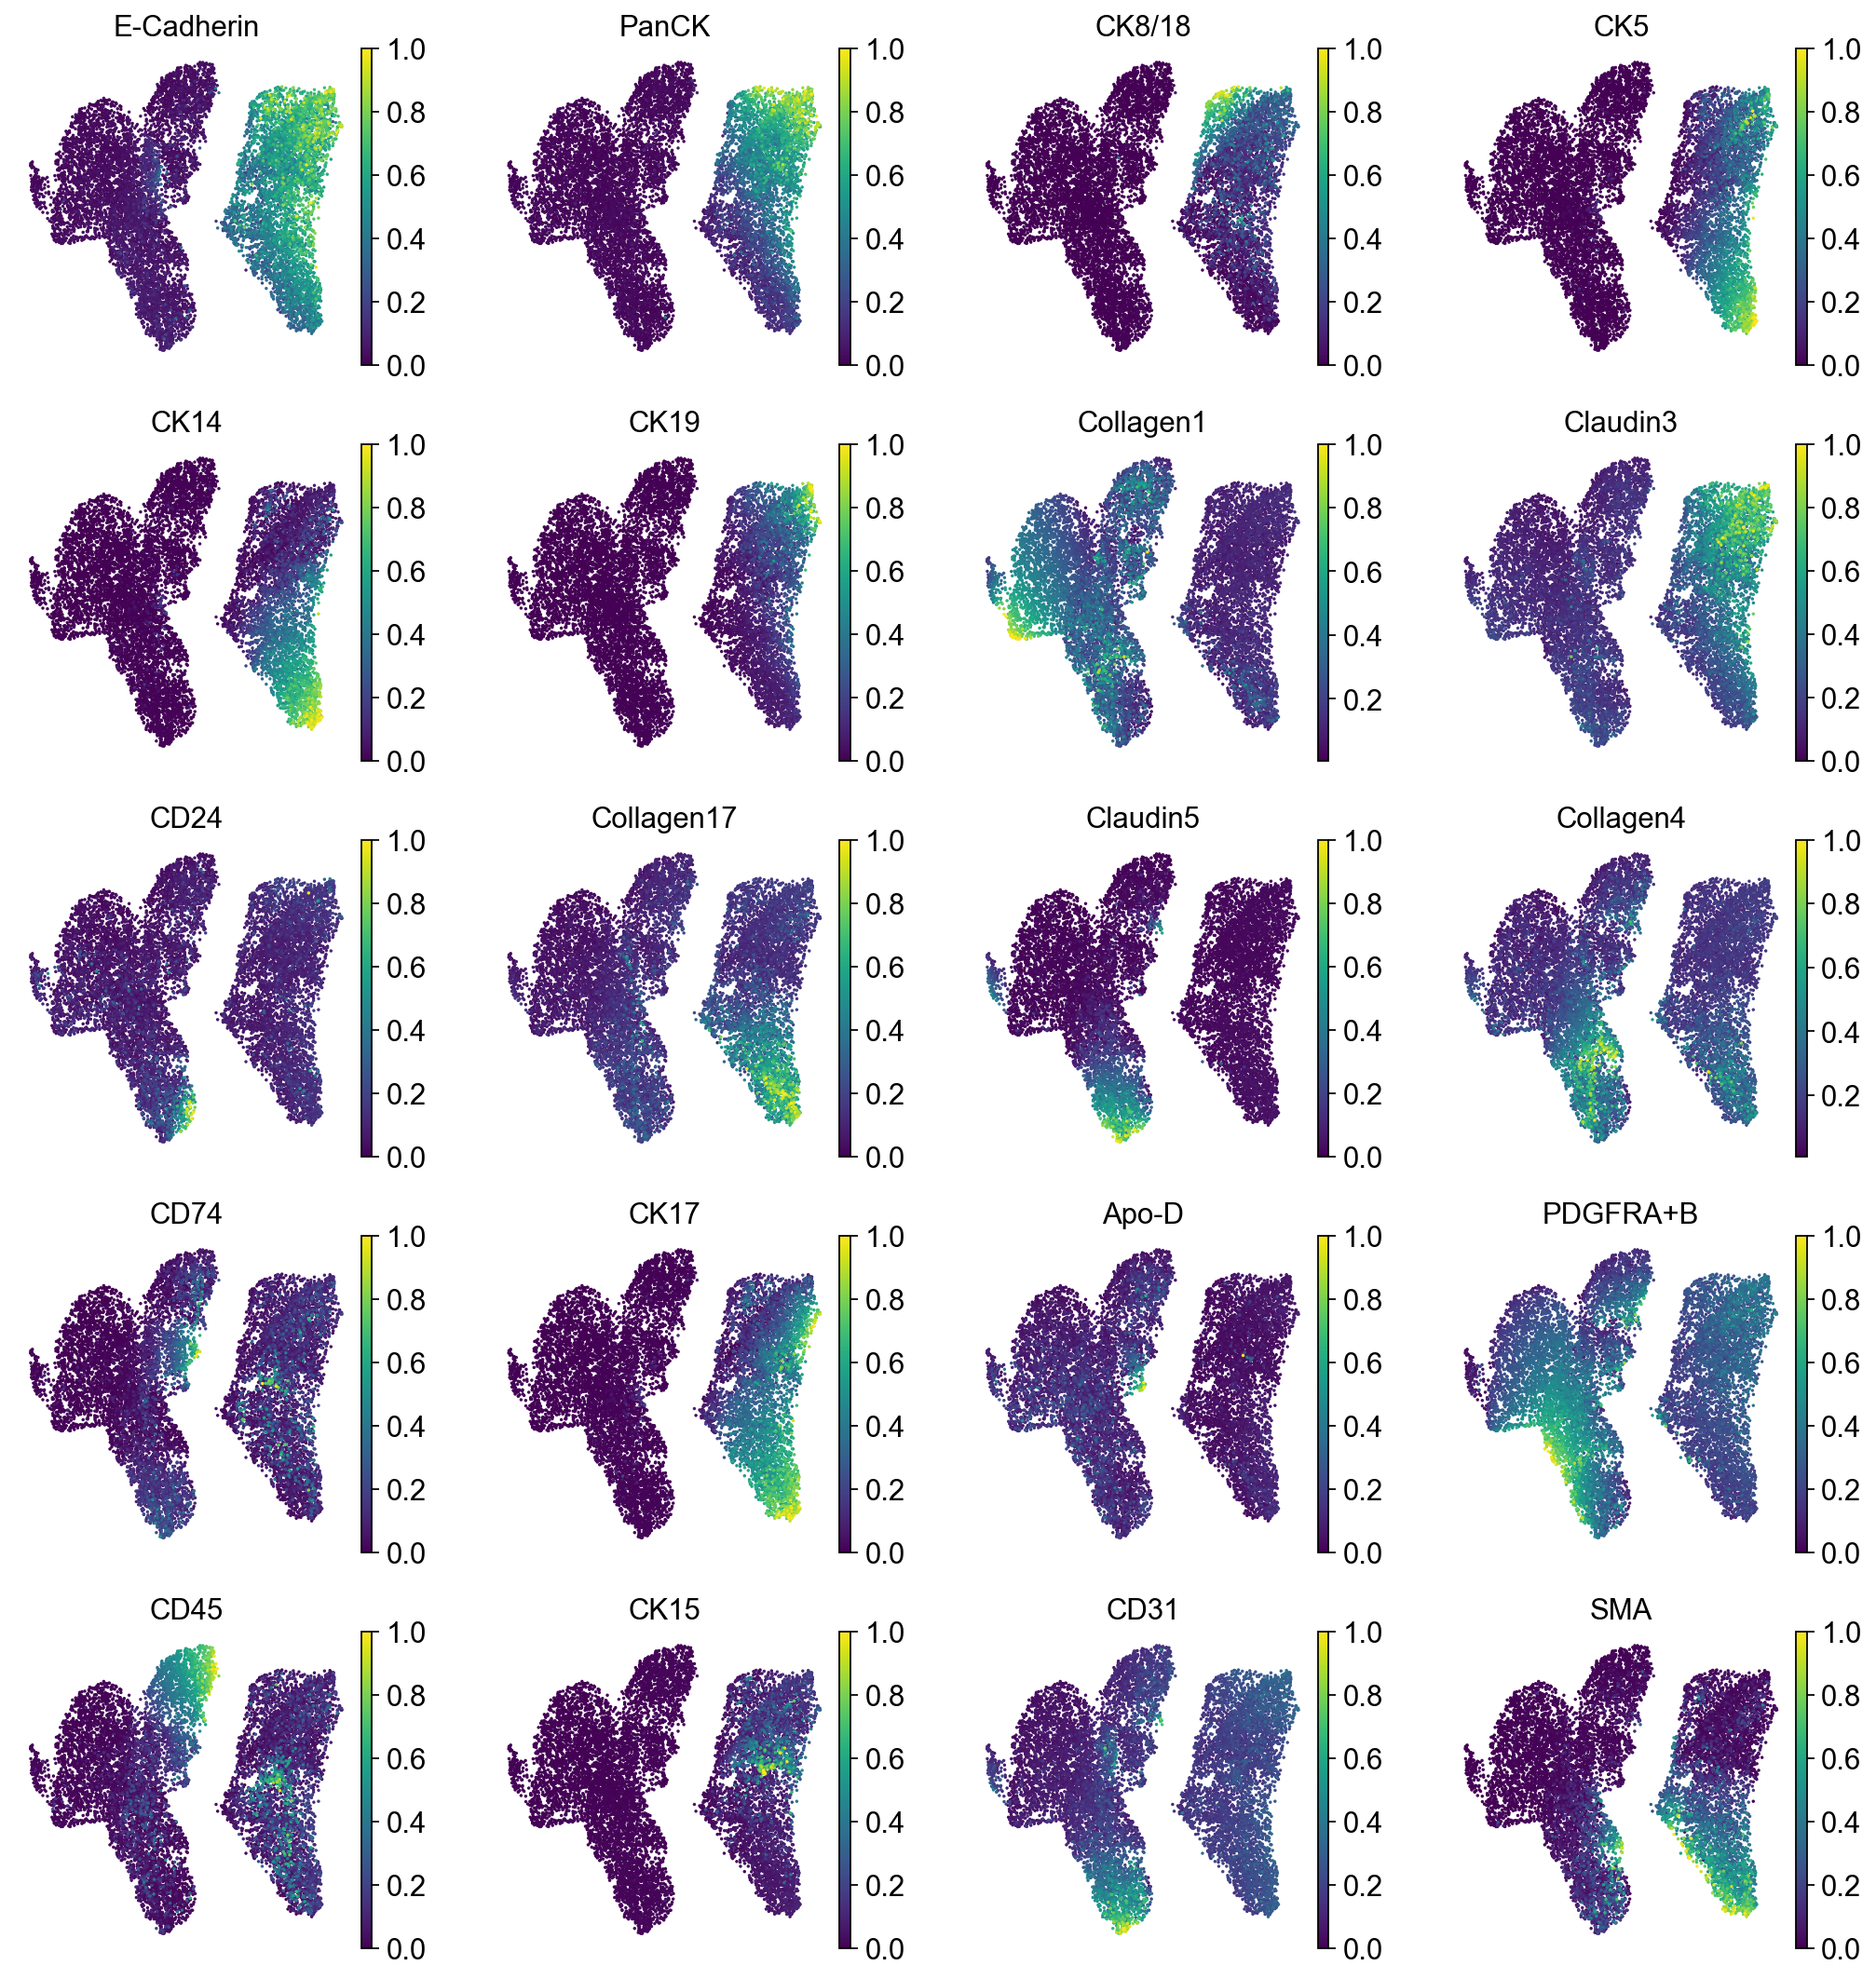

In [11]:
sc.pl.umap(cyto_ad, color=cyto_ad.var_names, save='umap_heatmap_plot_cytomarker.pdf')

In [13]:
#Define marker genes for heatmap
marker_genes_dict = {
    'Luminal': ['CK8/18', 'CK19', 'CK15', 'Claudin3', 'CD24'],
    'Basal': ['Collagen17', 'CK5', 'CK14', 'CK17', 'SMA'],
    'Fibroblast': ['Apo-D', 'PDGFRA+B', 'Collagen1'],
    'Endothelial': ['Collagen4', 'CD31', 'Claudin5', 'CD74'],
    'Immune': ['CD45'],
}

categories: 0, 1, 2, etc.
var_group_labels: Luminal, Basal, Fibroblast, etc.


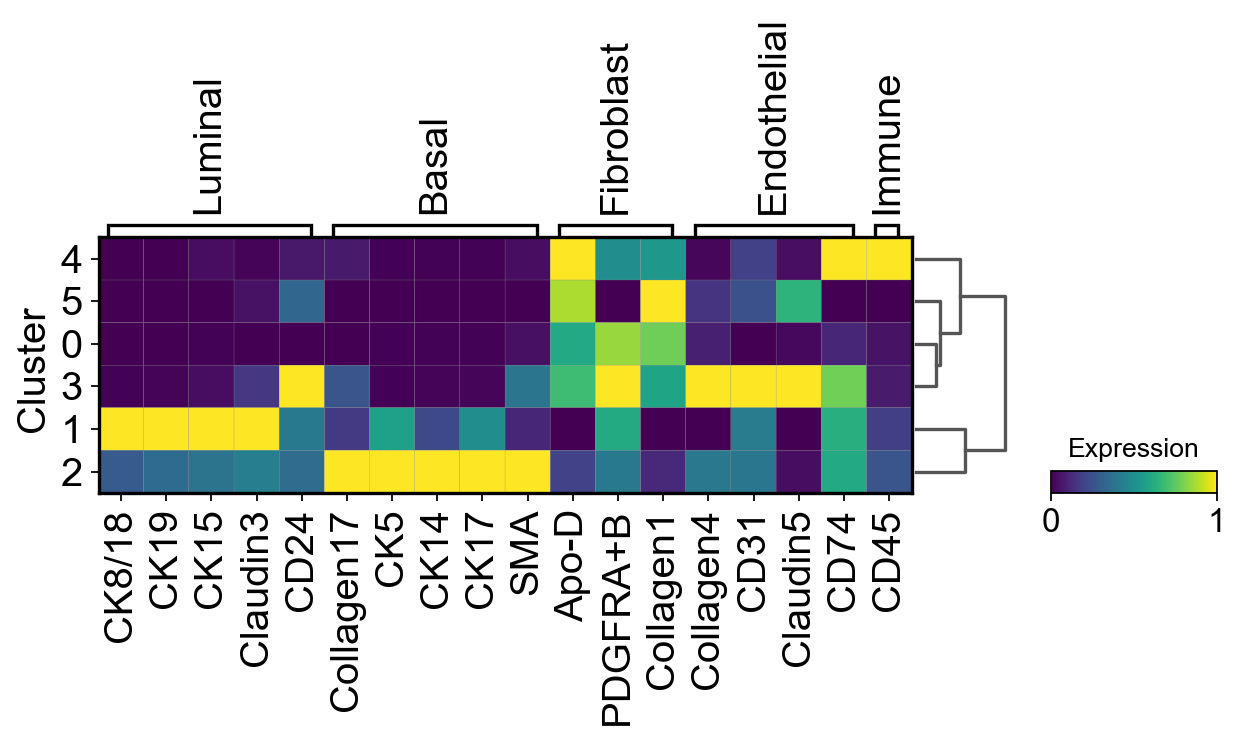

In [16]:
sc.settings.verbosity = 1             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(10, 10), facecolor='white') 

# Set global font size for matplotlib
plt.rcParams.update({'font.size': 18})

# Create the matrix plot
ax_dict = sc.pl.matrixplot(cyto_ad, marker_genes_dict, 'leiden', 
                           dendrogram=True, cmap='viridis', standard_scale='var', 
                           colorbar_title='Expression', show=False)

# Increase font size for the main heatmap axis labels (y-axis and x-axis labels)
ax_dict['mainplot_ax'].tick_params(axis='y', labelsize=18)
ax_dict['mainplot_ax'].tick_params(axis='x', labelsize=18)

# Adjust the font size of gene group labels (cell type labels)
for label in ax_dict['gene_group_ax'].get_yticklabels():
    label.set_fontsize(18)

# Increase the font size of the color legend title
ax_dict['color_legend_ax'].set_title(ax_dict['color_legend_ax'].get_title(), fontsize=12)

# Add the "Cluster" title to the left side of the plot with increased font size
plt.gcf().text(0.135, 0.4, 'Cluster', va='center', ha='center', rotation='vertical', fontsize=18)

# Save the plot as a PDF
plt.savefig('cyto_updated_matrix_plot.pdf', format='pdf', bbox_inches='tight')

# Display the plot
plt.show()